# Cervical Cancer Risk Classification


Index:
1. Introduction
2. Data Description
3. Preprocessing
4. Exploratory Data Analysis
5. Feature Engineering
6. Feature Selection
7.   Overview on machine learning algorithms
 > 1.   Logistic Regression
 > 2.   Decision Trees
 > 3.   Random Forest
 > 4.  Naive Bayes
8. Initial Models
9. Final Models & Optimization
10.  Conclusions
11. References

# 1. Introduction

In this project we want to analyze and implement some of the main Machine Learning algorithms using the Python language. To perform these analysis, we will use the Cervical Cancer (Risk Factors) Data Set. The data set was obtained from UCI's Machine Learning Repository. 
We will first explore the dataset and apply some preprocessing techniques.
In this analysis, machine learning techniques were used to build a predictive model for cervical cancer biopsy results based on cytology results and other potential risk factors, including demographics and patient history. The importance of various risk factors were explored.
Before starting, we import the required libraries and read the file containing the dataset.


### Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, learning_curve, train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score
from fancyimpute import KNN
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

%matplotlib inline
sns.set_style('white')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
url = "./gdrive/My Drive/risk_factors_cervical_cancer.csv"
df = pd.read_csv(url)

# 2. Data Description

We report here the description of the dataset provided by the creators:

The dataset was collected at 'Hospital Universitario de Caracas' in Caracas, Venezuela. This dataset focuses on the prediction of indicators/diagnosis of cervical cancer. The features cover demographic information, habits, and historic medical records of 858 patients. Several patients decided not to answer some of the questions because of privacy concerns (missing values).

We report here information about the dataset:


 Number of instances: 858 

 Number of attributes: 36 

 Attribute Characteristics: Integer, Real

 Data Set Characteristics: Multivariate

 Missing attribute values: Yes ( Marked as ? )

 

The following are the description of independent and the dependent attributes:

- Age : It indicates the age of a woman. It is expressed in terms of numerical values 

- Number of sexual partners: It indicates the total number of sexual partners encountered. It is expressed in terms of numerical values.

- First sexual intercourse: It indicates the age of a woman when she had her first sexual intercourse. It is expressed in terms of the count.

- Number of pregnancies: It indicates the total number of times the woman got pregnant. It is expressed in terms of the total count.

- Smokes: It indicates whether the person smokes or not. It is expressed in terms of zeros (does not smoke) and ones(smokes).

- Smokes (years): It indicates the total number of years for which the woman is smoking. It is expressed in terms of total count.

- Smokes (packs/year): It indicates the total number of packets of cigarettes per year the woman smokes. It is expressed in terms of numbers

- Hormonal Contraceptives: It indicates whether the patient uses hormonal contraceptives or not.

- Hormonal Contraceptives (years): It indicates that for how many years the contraceptive method was used. It was in expressed in terms of total number of years.

- Intra-Uterine Device: It indicated where the intrauterine contraceptive device was used or not. It was expressed in terms of zeros( did not used IUD) and ones( used IUD).

- IUD (years): It indicated that for how many years the IUD was used. It is expressed in terms of the total number of years.

- STDs: It indicates the presence of Sexually Transmitted Diseases. It is expressed in terms of zeroes and ones.

- STDs (number): It indicates the total number of sexually transmitted disease present with the patient. It is expressed in terms of numbers.

- STDs:condylomatosis: It indicates the presence of Condylomatosis with the patient.

- STDs:cervical condylomatosis –It indicates the presence of Cervical condylomatosis.

- STDs:vaginal condylomatosis - It indicates the presence of Vaginal condylomatosis.

- STDs:vulvo-perineal condylomatosis – It indicates the presence of Vulvo- Perineal condylomatosis.

- STDs:syphilis – It indicates the presence of Syphilis.

- STDs:pelvic inflammatory disease- It indicates the presence of pelvic inflammatory disease.

- STDs:genital herpes – It indicates the presence of Genital Herpes.

- STDs:molluscum contagiosum – It indicates the presence of Molluscum Contagiosum.

- STDs:AIDS – It indicates the presence of AIDS in the patient.

- STDs:HIV – It indicates the presence of HIV in the patient.

- STDs:Hepatitis B – It indicates the presence of Hepatitis B in the patients.

- STDs:HPV – It indicates the presence of HPV in the patients.

- STDs: Number of diagnosis – It indicate the total number of times the STDs have been diagnosed.

- STDs: Time since first diagnosis – It indicates the total number of years since the first diagnose.

- STDs: Time since last diagnosis – It indicates the total number of years elapsed since the last diagnose.

- Dx:Cancer – It indicates the person had previous cervical cancer diagnostic.

- Dx:CIN – It indicates the person had previous diagnostic of Cervical intraepithelial neoplasia.

- Dx:HPV- It indicates the presence of Human papillomaviruses.

- Dx - It indicates the presence any one among cancer, CIN and HPV.

- Hinselmann – also known as colposcopy, is a medical diagnostic procedure to examine an illuminated, magnified view of the cervix as well as the vagina and vulva.

- Schiller - Schiller Iodine test is a medical test in which iodine solution is applied to the cervix in order to diagnose cervical cancer.

- Cytology – also called as PaP smears test, helps detect abnormal cells in the cervix, which can develop into cancer.

- Biopsy (Target Variable) - A cervical biopsy is a surgical procedure in which a small amount of tissue is removed from the cervix. A cervical biopsy is usually done after an abnormality has been found during cytology.

## Checking the datatypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

* Predominant of the features are of categorical and remaining are of numerical.

## Checking the dimentions

In [ ]:
print("Data contains %i observations & %i columns. " %df.shape)

Data contains 858 observations & 36 columns. 


In [ ]:
col = df.columns
print(col)

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')


In [ ]:
df.shape

(858, 36)

In [ ]:
# Check first few rows. Note that the data set contains missing values marked as "?".
df.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


#  Preprocessing

## Missing Values

Replace the questions marks with Nan and showing the total missing values for each column.

In [ ]:
# Replace question marks with missing values.
cols = df.columns

for col in cols:
    if type(df[col][0])==str:
        df[col] = df[col].replace({'?': np.nan})
df.isnull().sum() #showing the number of null values for each column

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

Text(0.5, 1.0, 'Missing Values')

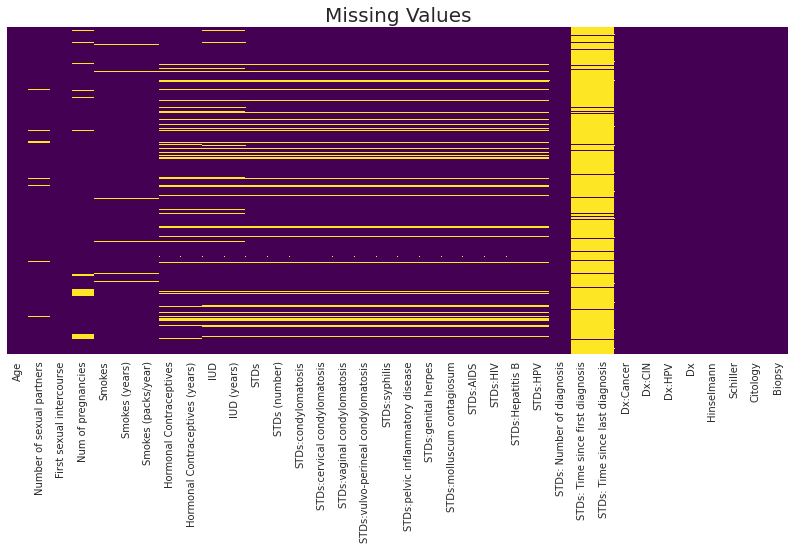

In [ ]:
# Look at missing data.
plt.figure(figsize=(14,6))
p = sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
p.axes.set_title("Missing Values",fontsize=20)

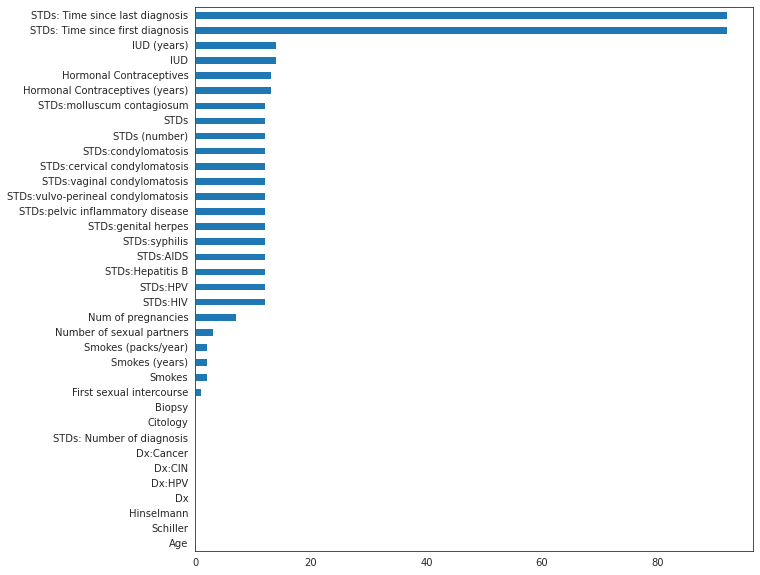

In [ ]:
plt.figure(figsize=(10,10))
np.round(df.isnull().sum()/df.shape[0]*100).sort_values().plot(kind='barh')

## Dropping Unneeded Features


Two features contain mostly missing values, and these features will therefore be dropped.

In [ ]:
# Remove both columns with large number of missing values.
df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],axis=1,inplace=True)

In [ ]:
# Check number of missing values for each of the remaining features. 
print('Number of missing values:')
df.isnull().sum()

Number of missing values:


Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

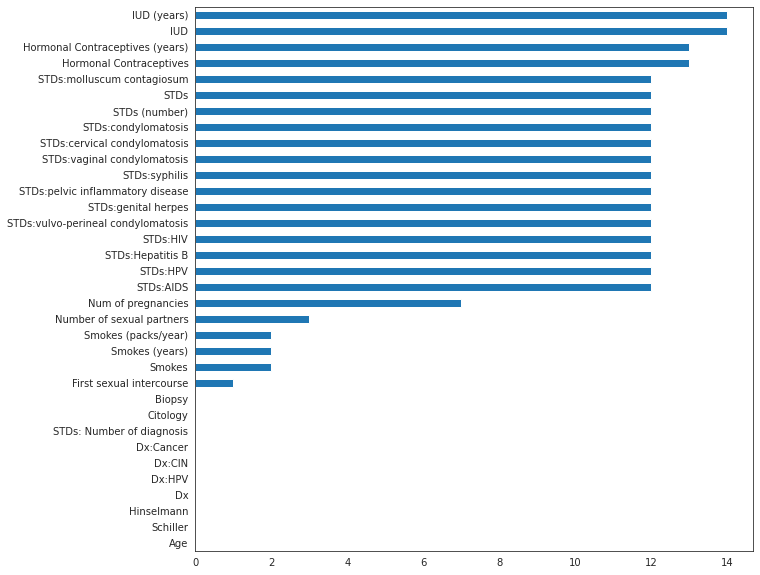

In [ ]:
plt.figure(figsize=(10,10))
np.round(df.isnull().sum()/df.shape[0]*100).sort_values().plot(kind='barh')

Note that data collected on hormonal contraceptives, STDs, and IUDs have a lot of missing values.

## Features Types
The numerical and categorical features are seprated for handling their missing values. 

## Handeling missing values 


Text(0.5, 1.0, "Binary Features: Visualizing the 1's (remaining values are 0 or missing)")

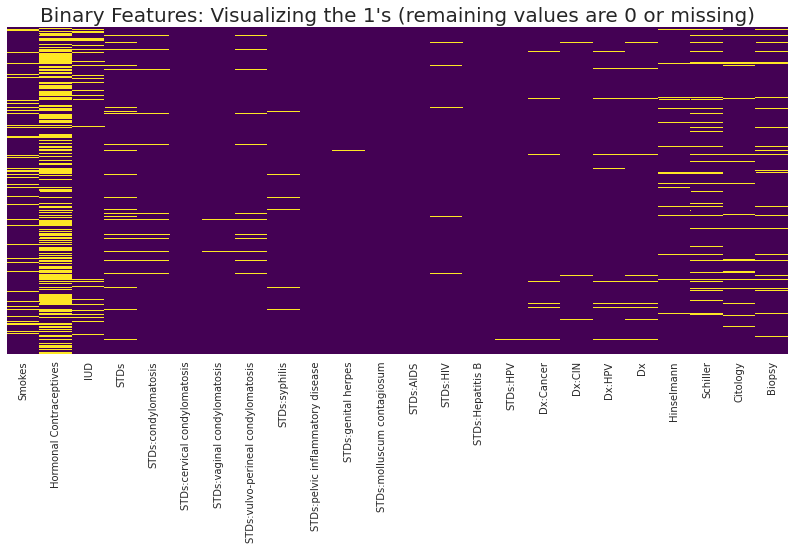

In [ ]:
# Separate binary features from integer features, and plot the 1's within each binary feature.

# Identify features that are integers.
int_cols = ['Age', 
            'Number of sexual partners', 
            'First sexual intercourse', 
            'Num of pregnancies',
            'Hormonal Contraceptives (years)', 
            'IUD (years)',
            'STDs (number)',
            'STDs: Number of diagnosis',
            'Smokes (years)',
            'Smokes (packs/year)'
           ]

# Get all data for binary features and convert to float.
df_bin = df.drop(int_cols,axis=1)
for col in df_bin.columns:
    df_bin[col] = df_bin[col].apply(lambda x: float(x))

# Plot the 1's in the binary data.
plt.figure(figsize=(14,6))
p = sns.heatmap(df_bin == 1,yticklabels=False,cbar=False,cmap='viridis')
p.axes.set_title("Binary Features: Visualizing the 1's (remaining values are 0 or missing)",fontsize=20)

As we see most of the binary features contain mostly values of 0. Some of the features appear to not contain any 1's. Features with 2 or fewer 1's will be dropped.

In [ ]:
# Drop binary features with 2 or fewer 1's.
del_lst = []
flag_lst = []
for col in df_bin.columns:
    if df_bin[df_bin[col]==1][col].count() <= 2:
        del_lst.append(col)
        
df_bin.drop(del_lst,axis=1,inplace=True)

The following Categorical Features are dropped because they contained 2 or fewer 1's values.

- STDs:cervical condylomatosis
- STDs:pelvic inflammatory disease
- STDs:genital herpes
- STDs:molluscum contagiosum
- STDs:AIDS
- STDs:Hepatitis B
- STDs:HPV

Null values of categorical features

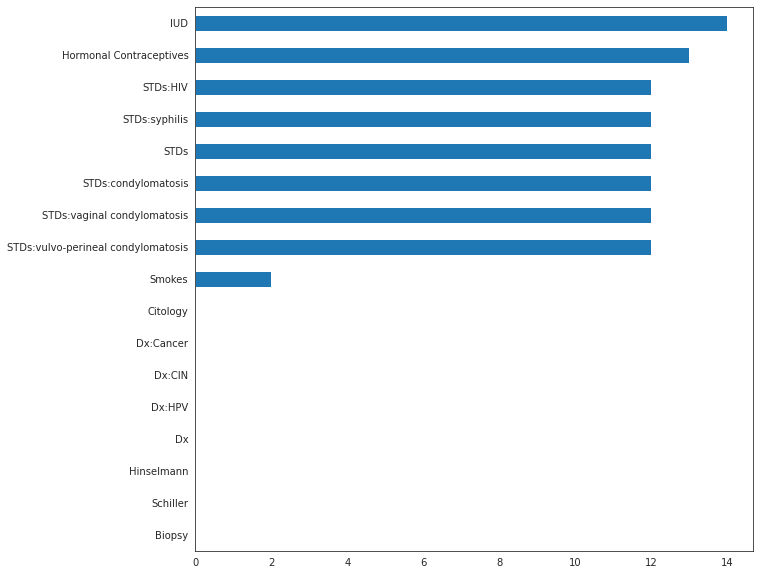

In [ ]:
plt.figure(figsize=(10,10))
np.round(df_bin.isnull().sum()/df_bin.shape[0]*100).sort_values().plot(kind='barh')

In [ ]:
int_cols

['Age',
 'Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Hormonal Contraceptives (years)',
 'IUD (years)',
 'STDs (number)',
 'STDs: Number of diagnosis',
 'Smokes (years)',
 'Smokes (packs/year)']

In [ ]:
df_bin.columns

Index(['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs',
       'STDs:condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:HIV',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

### Fancyimput
fancyimpute is a library for missing data imputation algorithms. It uses machine learning algorithm to impute missing values. Fancyimpute uses all the column to impute the missing values. Here we used the KNN Imputation.

KNN or K-Nearest Neighbor

To fill out the missing values KNN finds out the similar data points among all the features. Then it took the average of all the points to fill in the missing values.

 ### Imputation Using (Mean) Values
This works by calculating the mean of the non-missing values in a column and then replacing the missing values within each column separately and independently from the others. It can only be used with **numeric data**.

In [ ]:
# Impute missing values using KNN imputation (standardize integer data first).

# Standardize integer data.
df_int = df[int_cols]
int_lst = []
col_means = []
col_stds = []

for col in int_cols:
    df_fl = df_int[col].apply(lambda x: float(x))
    col_mean = df_fl.mean()
    col_std = df_fl.std()
    col_means.append(col_mean)
    col_stds.append(col_std)
    int_lst.append(df_int[col].apply(lambda x: (float(x) - col_mean)/col_std))

df_scaled = pd.DataFrame(int_lst).transpose()

# Combine binary and integer (scaled) data sets.
df_bin_int = pd.concat([df_scaled,df_bin],axis=1)

# Use KNN to impute missing values (k=3).
df_imputed = KNN(k=3).fit_transform(df_bin_int)
df_imputed = pd.DataFrame(df_imputed)
df_imputed.columns = df_bin_int.columns

# Convert imputed values for binary variables to 0's and 1's (1 for imputed values >= 0.5).
for col in df_bin.columns:
    df_imputed[col] = df_imputed[col].apply(lambda x: 1 if x >= 0.5 else 0)

# Convert integer data back to original state (unstandardized) to improve interpretability of results.
for i in range(len(int_cols)):
    df_imputed.iloc[:,i] = df_imputed.iloc[:,i].apply(lambda x: x*col_stds[i] + col_means[i])

Imputing row 1/858 with 0 missing, elapsed time: 0.213
Imputing row 101/858 with 0 missing, elapsed time: 0.216
Imputing row 201/858 with 0 missing, elapsed time: 0.220
Imputing row 301/858 with 0 missing, elapsed time: 0.225
Imputing row 401/858 with 0 missing, elapsed time: 0.229
Imputing row 501/858 with 0 missing, elapsed time: 0.233
Imputing row 601/858 with 0 missing, elapsed time: 0.237
Imputing row 701/858 with 12 missing, elapsed time: 0.239
Imputing row 801/858 with 0 missing, elapsed time: 0.244


In [ ]:
# Check number of missing values for each of the remaining features. 
print('Number of missing values:')
df_imputed.isnull().sum()

Number of missing values:


Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Hormonal Contraceptives (years)       0
IUD (years)                           0
STDs (number)                         0
STDs: Number of diagnosis             0
Smokes (years)                        0
Smokes (packs/year)                   0
Smokes                                0
Hormonal Contraceptives               0
IUD                                   0
STDs                                  0
STDs:condylomatosis                   0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:HIV                              0
Dx:Cancer                             0
Dx:CIN                                0
Dx:HPV                                0
Dx                                    0
Hinselmann                            0
Schiller                              0


#  Data Exploration and Visualization

### Uni Variate Analysis

#### Overview of Target

In [ ]:
print('\n%i individuals had negative biopsy results' %df['Biopsy'].value_counts()[0])
print('%i individuals had positive biopsy results' %df['Biopsy'].value_counts()[1])


803 individuals had negative biopsy results
55 individuals had positive biopsy results


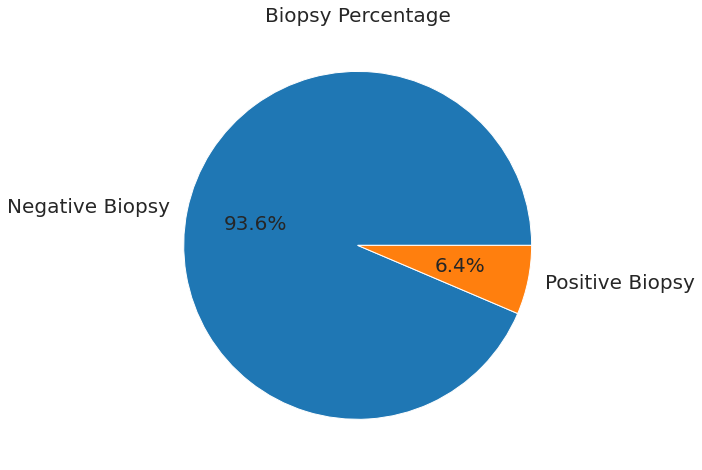

In [ ]:
# Analyzing the target variable
mylabels = ["Negative Biopsy", "Positive Biopsy"]
plt.figure(figsize = (12,8))
plt.title('Biopsy Percentage', fontsize=20)
plt.pie(df['Biopsy'].value_counts(),labels = mylabels,autopct='%1.1f%%',textprops = {'fontsize': 20})
plt.show()

As we can see we have  total of 858 observations, divided in 
803 individuals in Negative(0) and 55 individulas are Positive(1) Biopsy results.
There are many more individuals in the negative biopsy group, and this imbalance in categories presents some challenges for predictive modelling. 

On classification problems we need to know how
balanced the class values are. This is a highly
imbalanced problem. Since there is an imbalance in data, which needs to be taken care of in the model building section.

Count Plots of Categorical Columns

****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


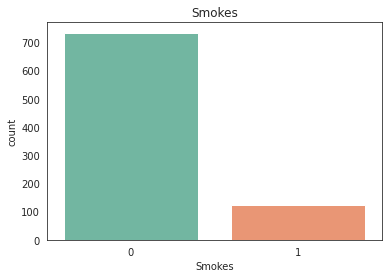

****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


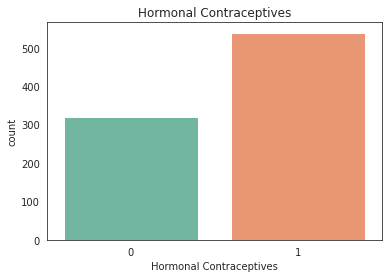

****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


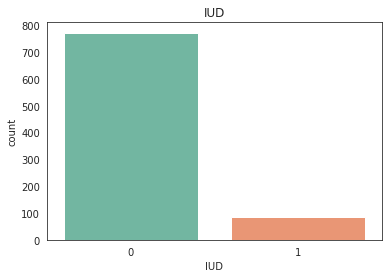

****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


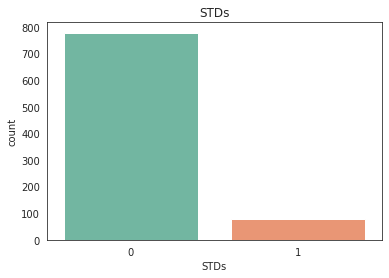

****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


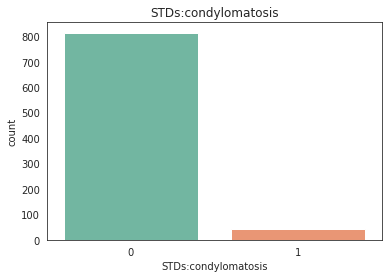

****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


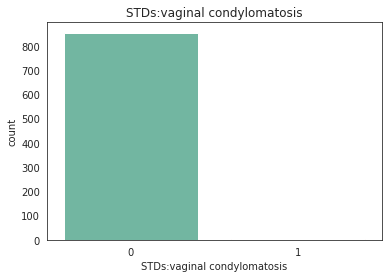

****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


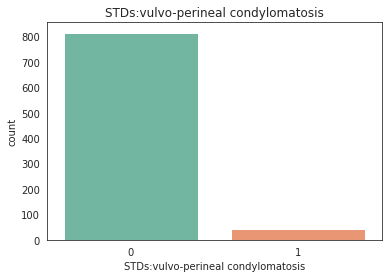

****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


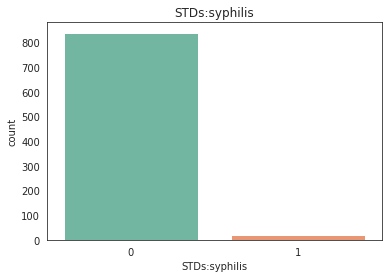

****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


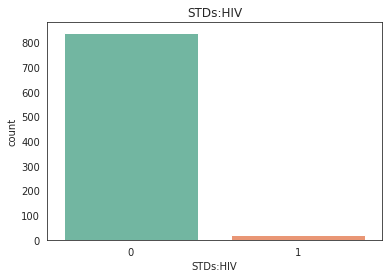

****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


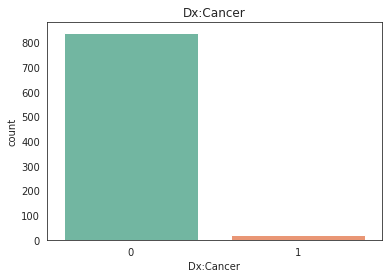

****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


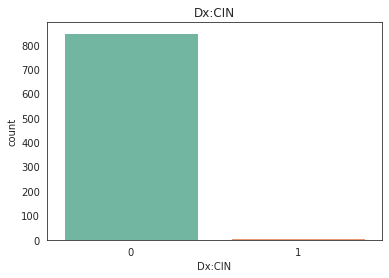

****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


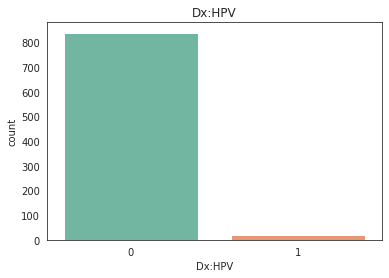

****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


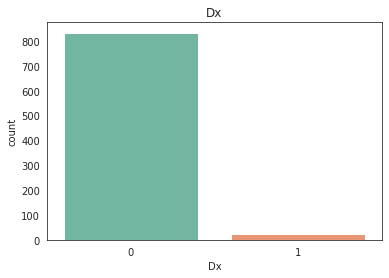

****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


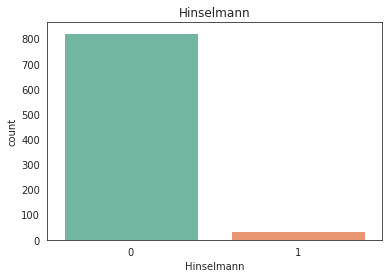

****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


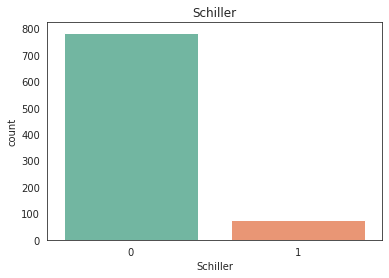

****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


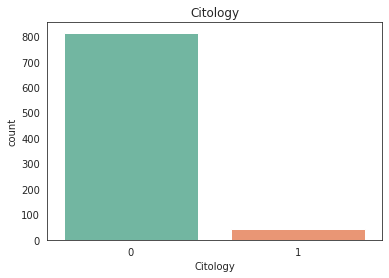

****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


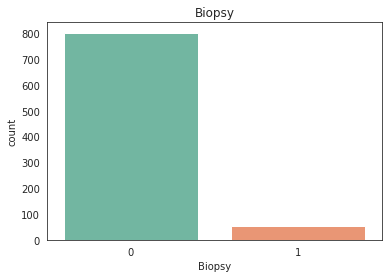

In [ ]:
print("Count Plots of Categorical Columns");print()
for i in df_bin.columns:
        print('*'*100)
        sns.countplot(df_imputed[i],palette="Set2")
        plt.title(i)
        plt.show()

Density Plots of Numerical Columns

****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


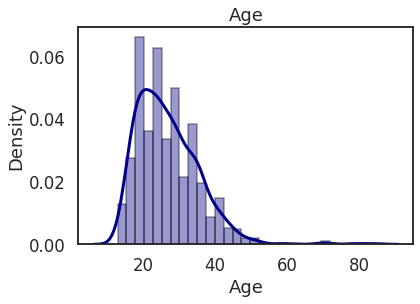

****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


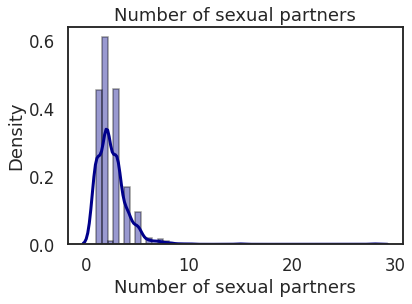

****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


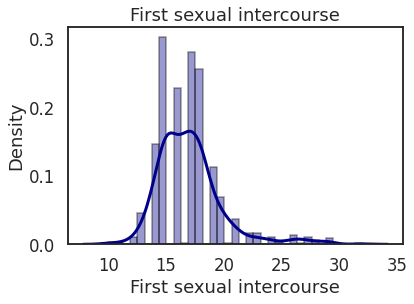

****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


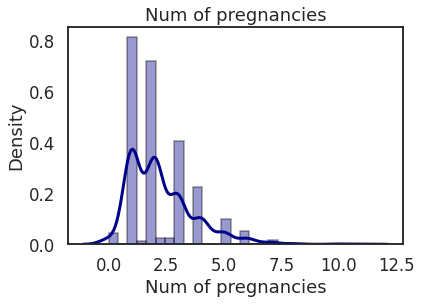

****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


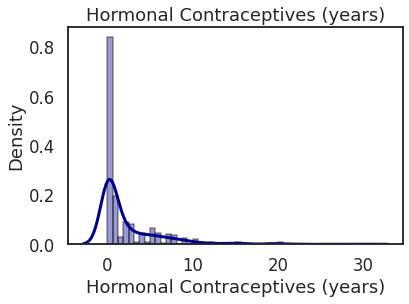

****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


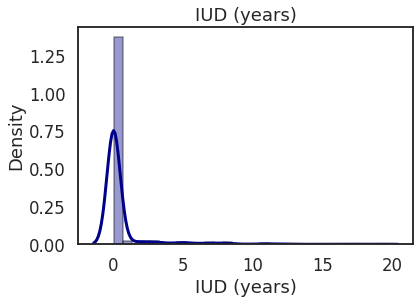

****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


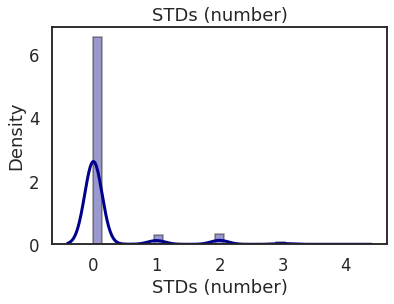

****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


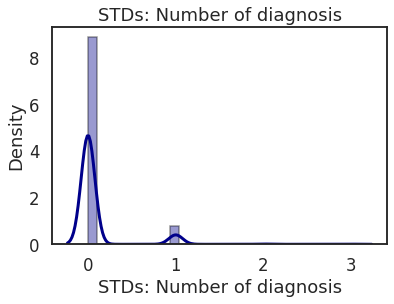

****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


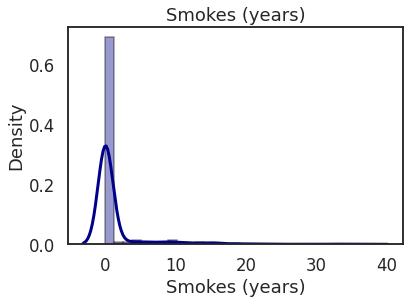

****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


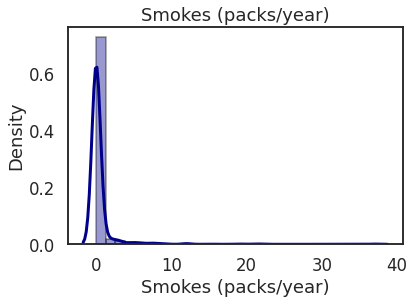

In [ ]:
print("Density Plots of Numerical Columns");print()
for i in df_imputed[int_cols]:
        print('*'*100)
        sns.distplot(df_imputed[i],color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
        plt.title(i)
        plt.show()

## Multivariate Analysis

In [ ]:
# process columns, apply object type to numeric type
for c in df.columns:
    if df[c].dtype == 'object':
        df[c]=pd.to_numeric(df[c], errors='coerce')

### Age and Sexual Habits vs Biopsy

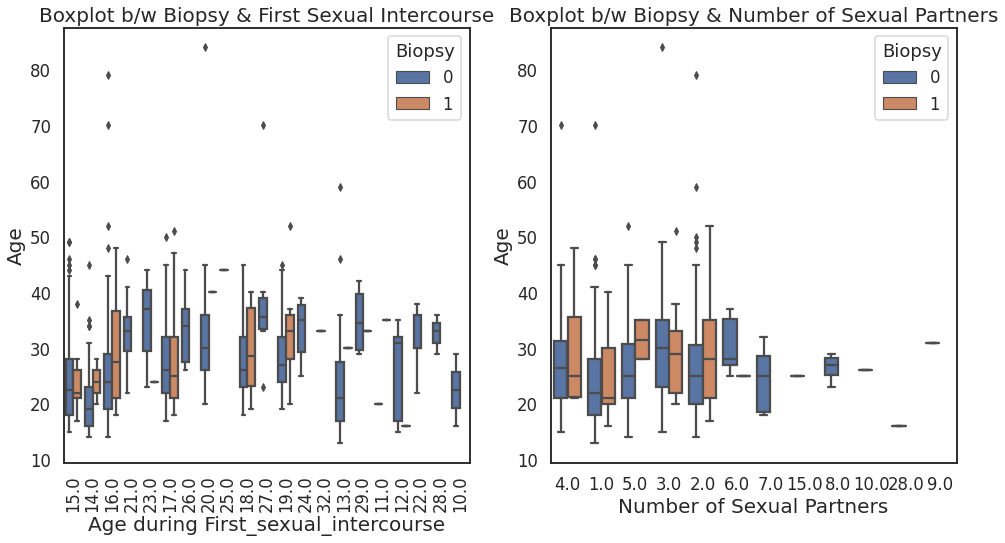

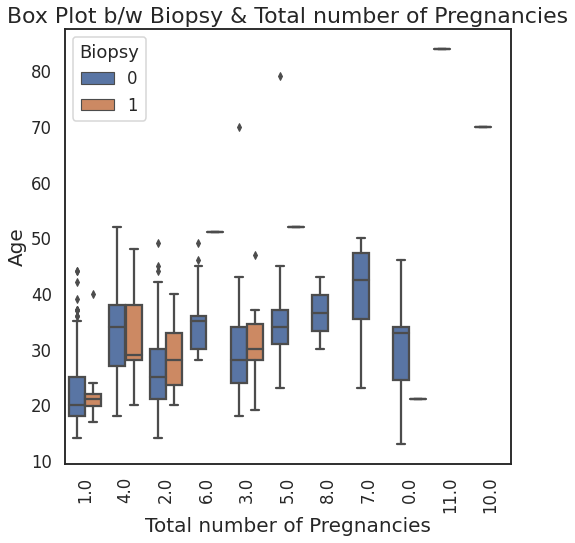

In [ ]:
plt.subplots(1,2,figsize=(16,8))
plt.subplot(1,2,1)
a=sns.boxplot(x=df['First sexual intercourse'],y=df['Age'], hue=df['Biopsy'])
a.axes.set_title("Boxplot b/w Biopsy & First Sexual Intercourse",fontsize=20)
a.set_xlabel("Age during First_sexual_intercourse",fontsize=20)
a.set_ylabel("Age",fontsize=20)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Boxplot b/w Biopsy & Number of Sexual Partners',fontsize=20)
a=sns.boxplot(x=df['Number of sexual partners'],y=df['Age'], hue=df['Biopsy'])
a.set_xlabel("Number of Sexual Partners",fontsize=20)
a.set_ylabel("Age",fontsize=20)
plt.show()
plt.figure(figsize=(8,8))
a=sns.boxplot(x=df['Num of pregnancies'],y=df['Age'], hue=df['Biopsy'])
a.axes.set_title("Box Plot b/w Biopsy & Total number of Pregnancies",fontsize=22)
a.set_xlabel('Total number of Pregnancies',fontsize=20)
plt.xticks(rotation=90)
a.set_ylabel("Age",fontsize=20)
plt.show()

### Smoke and Sexual Habits vs Biopsy 

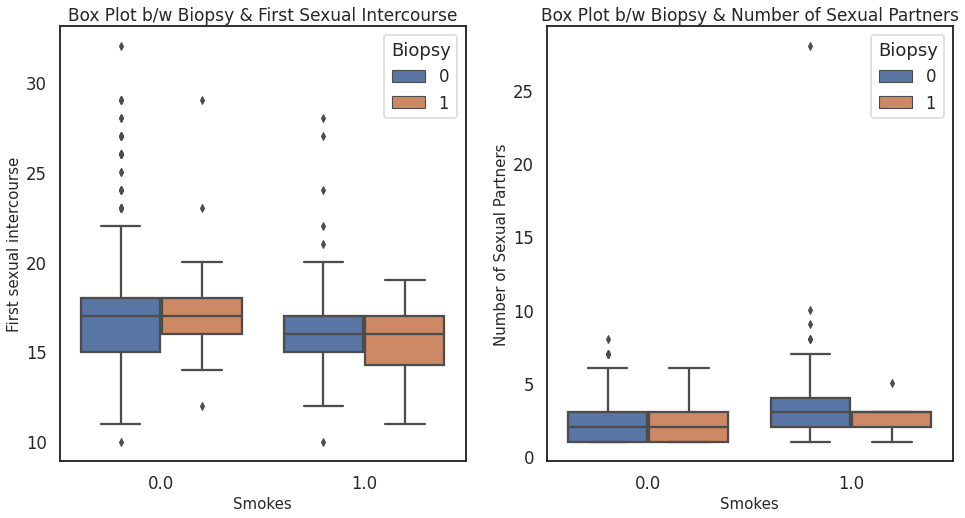

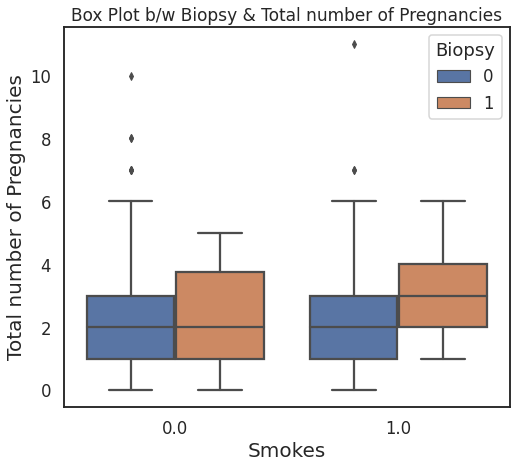

In [ ]:
plt.subplots(1,2,figsize=(16,8))
plt.subplot(1,2,1)
a=sns.boxplot(y=df['First sexual intercourse'],hue=df['Biopsy'],x=df['Smokes'])
a.axes.set_title("Box Plot b/w Biopsy & First Sexual Intercourse",fontsize=17)
a.set_xlabel("Smokes",fontsize=15)
a.set_ylabel("First sexual intercourse",fontsize=15)
plt.subplot(1,2,2)
plt.title('Box Plot b/w Biopsy & Number of Sexual Partners',fontsize=17)
a=sns.boxplot(y=df['Number of sexual partners'],hue=df['Biopsy'],x=df['Smokes'])
a.set_xlabel("Smokes",fontsize=15)
a.set_ylabel("Number of Sexual Partners",fontsize=15)
plt.figure(figsize=(8,7))
a=sns.boxplot(y=df['Num of pregnancies'],hue=df['Biopsy'],x=df['Smokes'])
a.axes.set_title("Box Plot b/w Biopsy & Total number of Pregnancies",fontsize=17)
a.set_xlabel('Smokes',fontsize=20)
a.set_ylabel("Total number of Pregnancies",fontsize=20)
plt.show()

### Age & Smokes vs Biopsy

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


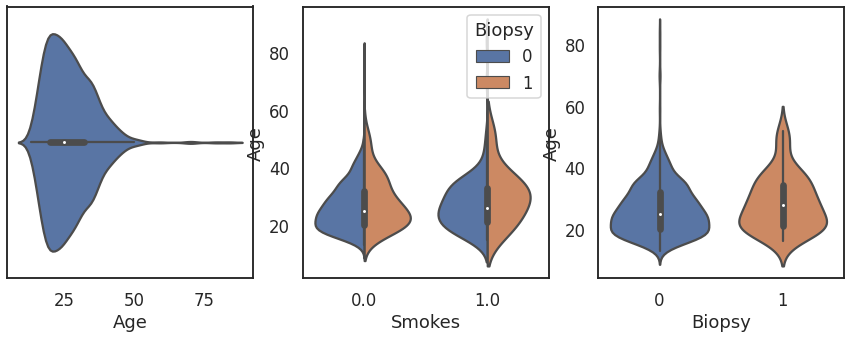

In [ ]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.violinplot(y=df['Age'],x=df['Smokes'],hue=df['Biopsy'],split=True, ax=axis2)
sns.violinplot(y=df['Age'],x=df['Biopsy'],ax=axis3)
sns.violinplot(df['Age'],ax=axis1)

### Age & Number of sexual partners vs Biopsy

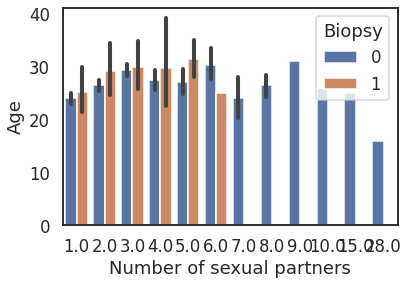

In [ ]:
sns.barplot(y=df['Age'],x=df['Number of sexual partners'],hue=df['Biopsy'])


### Age & First sexual intercourse vs Biopsy

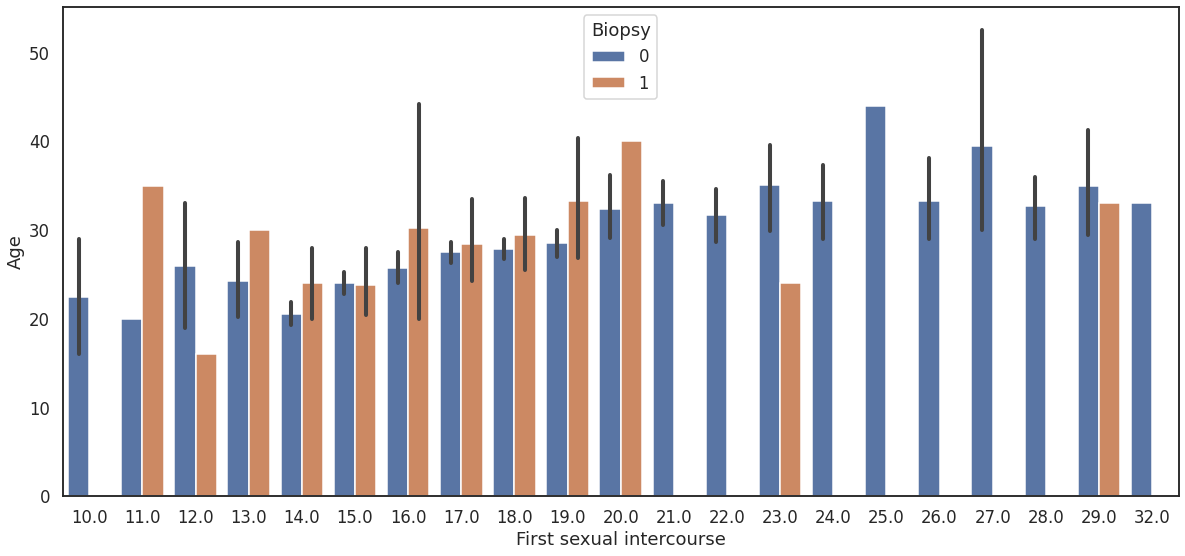

In [ ]:
f, ax = plt.subplots(figsize=(20, 9))
sns.barplot(y=df['Age'],x=df['First sexual intercourse'],hue=df['Biopsy'])

### Age & Smokes(years)

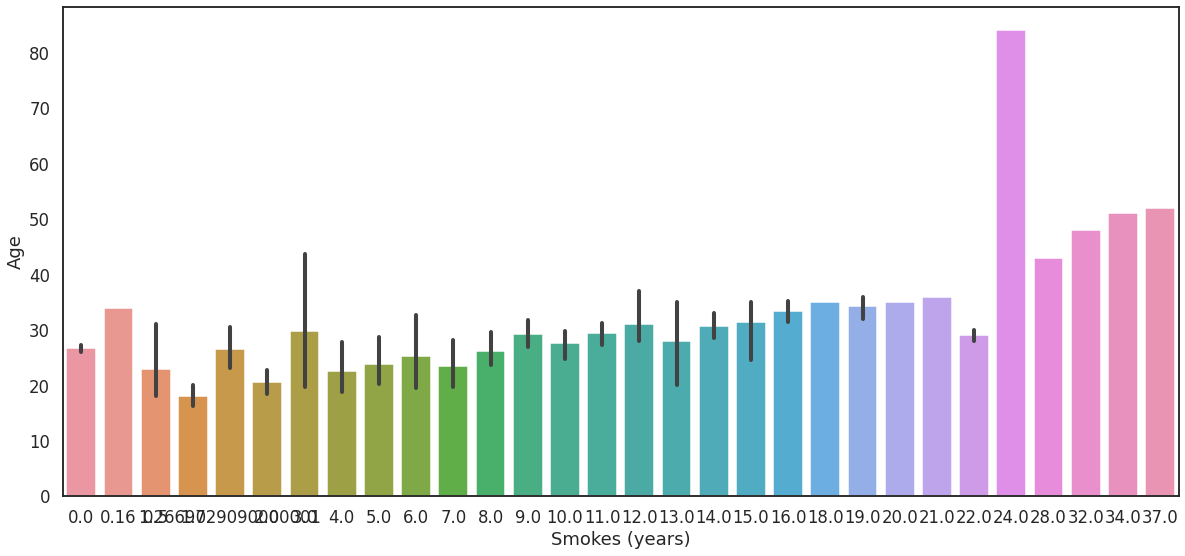

In [ ]:
f, ax = plt.subplots(figsize=(20, 9))
sns.barplot(y=df['Age'],x=df['Smokes (years)'])

### Smokes(years) & Number of sexual partners vs Biopsy

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


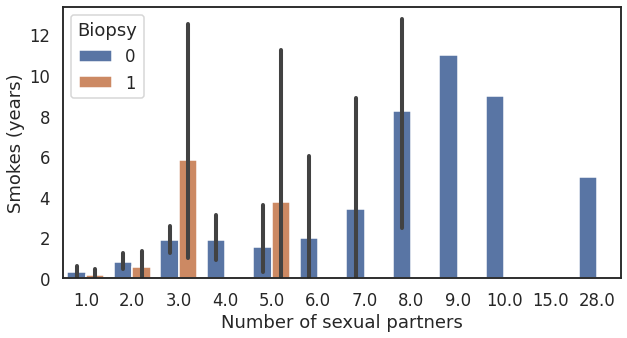

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
sns.barplot(df['Number of sexual partners'],df['Smokes (years)'],hue=df['Biopsy'])

### Age & Num of pregnancies vs Biopsy

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


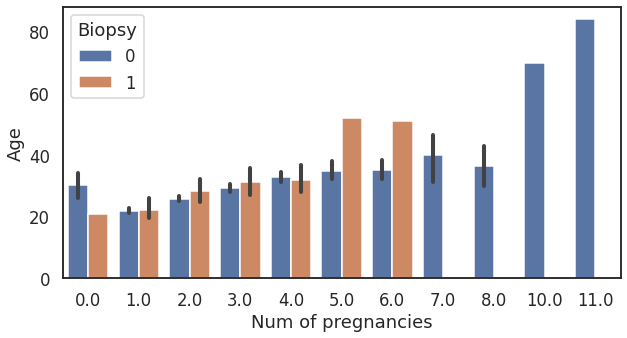

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
sns.barplot(df['Num of pregnancies'],df['Age'],hue=df['Biopsy'])

### Number of sexual partners vs Biopsy

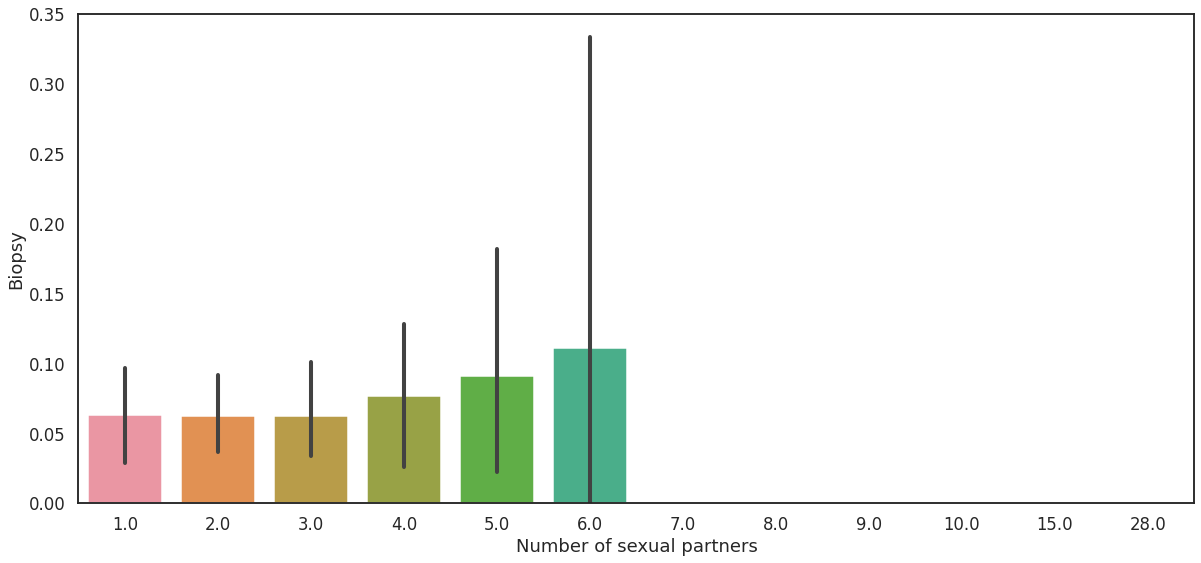

In [ ]:
f, ax = plt.subplots(figsize=(20, 9))
sns.barplot(y=df['Biopsy'],x=df['Number of sexual partners'])

### Conclusion 
* Most of the patients are in the age group 20-40
* Predominant of the patients had 0-5 sexual partners
* Most of the patients their first sexual intercourse between 15-20 years
* The larger group of patients had 1-3 pregnancies overall in their life
* Relatively larger proportion of the patients are non-smokers (around 700) and only a very few (around 100) are smokers.

### Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable. Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable) Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

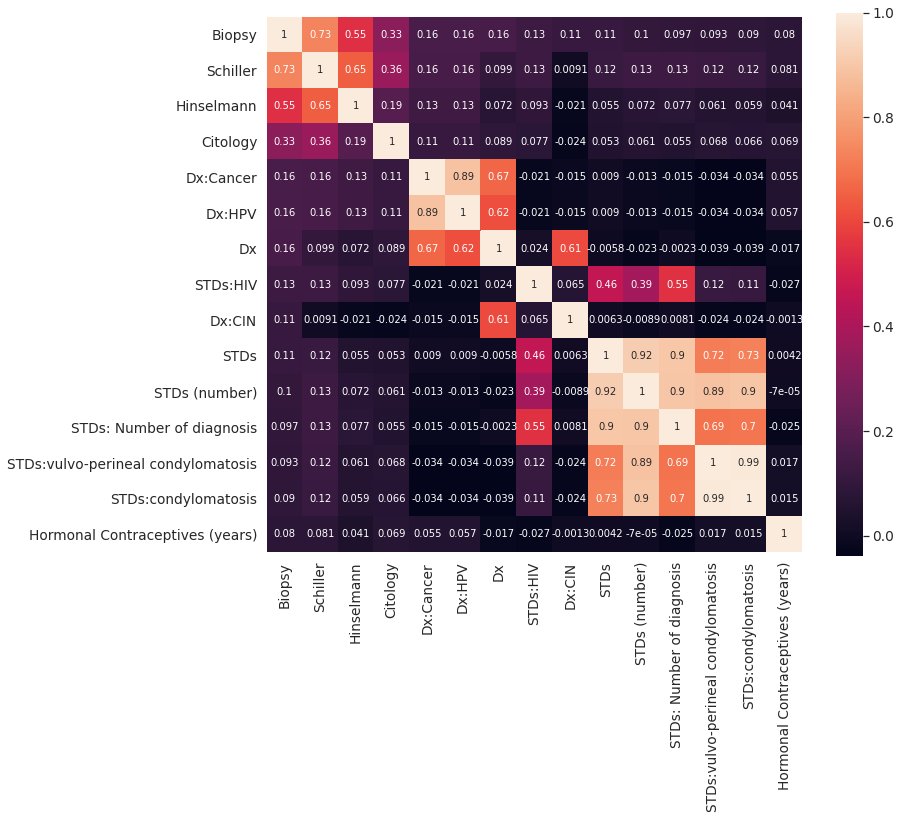

In [ ]:
# list the heatmap of top 15 variables correlation

corr = df_imputed.corr()
# number of variables for heatmap
k = 15
cols = corr.nlargest(k,'Biopsy')['Biopsy'].index
cm = np.corrcoef(df_imputed[cols].values.T)

plt.figure(figsize=(12, 10))

sns.set(font_scale=1.25)
sns.heatmap(cm, cbar = True, annot = True, square = True, annot_kws = {'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

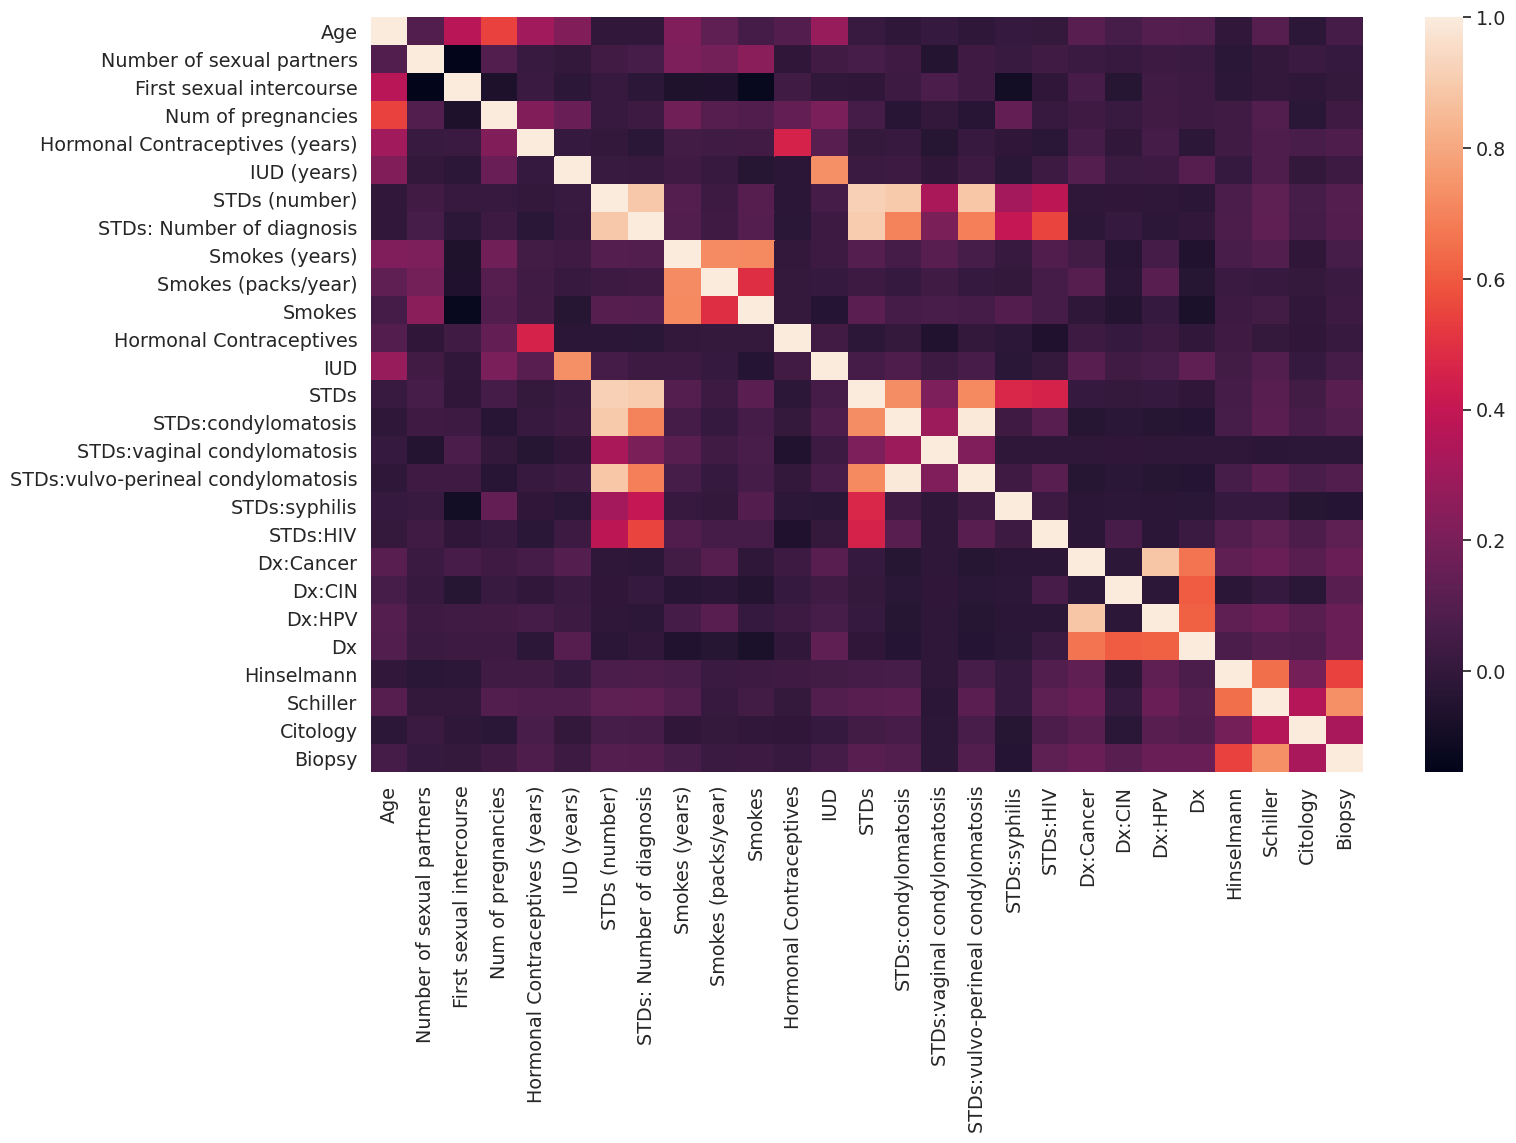

In [ ]:
corr = df_imputed.corr(method='pearson')
plt.figure(figsize=(16,10), dpi=100)
sns.heatmap(corr, annot=False, fmt='.2')
plt.show()

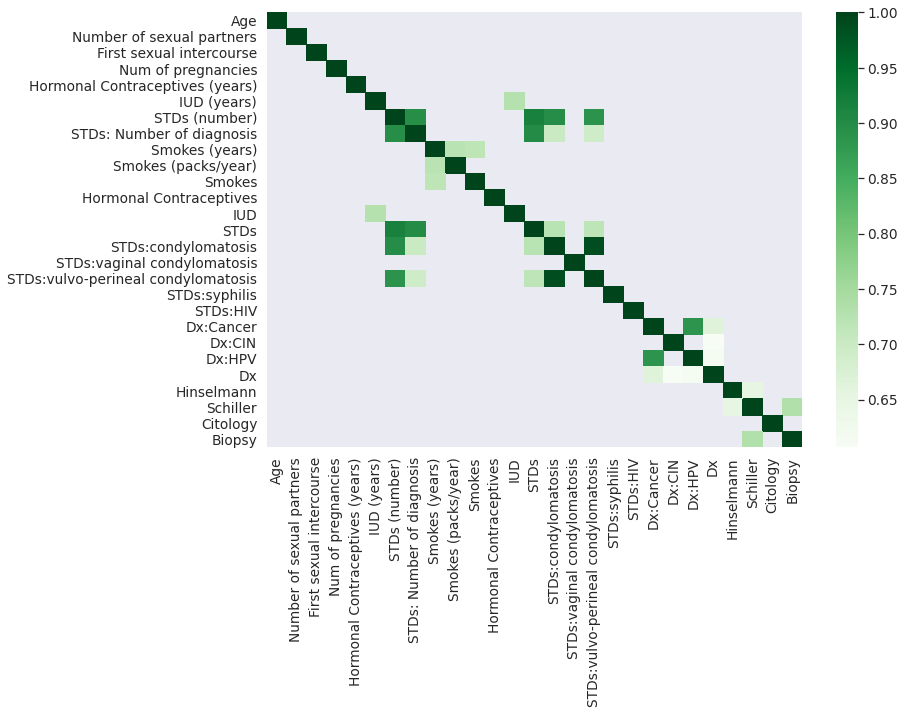

In [ ]:
corr = df_imputed.corr()
kot = corr[corr>=.6]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

### Hormonal Contraceptives(years) and Age vs Biopsy Result

We want to check the relationship between **Hormonal Contraceptives(years)** and **Age** features with **Biopsy results**.


In [ ]:
# Identify age groupings for individuals. 
age_groups = []
for i in range(len(df_imputed)):
    if df_imputed['Age'].iloc[i] >= 50:
        age_groups.append('Group 5: 50+')
    elif df_imputed['Age'].iloc[i] < 50 and df_imputed['Age'].iloc[i] >= 40:
        age_groups.append('Group 4: 40-50')
    elif df_imputed['Age'].iloc[i] < 40 and df_imputed['Age'].iloc[i] >= 30:
        age_groups.append('Group 3: 30-40')
    elif df_imputed['Age'].iloc[i] < 30 and df_imputed['Age'].iloc[i] >= 20:
        age_groups.append('Group 2: 20-30')
    elif df_imputed['Age'].iloc[i] < 20:
        age_groups.append('Group 1: Under 20')
    else:
        age_groups.append('None')

In [ ]:
# Identify Hormonal Contraceptives (years) groupings for individuals. 
h_contr = df_imputed['Hormonal Contraceptives (years)']
contr_grp = []
for i in range(len(h_contr)):
    if h_contr.iloc[i] == 0:
        contr_grp.append('Group 1: None')
    elif h_contr.iloc[i] < 2 and h_contr.iloc[i] > 0:
        contr_grp.append('Group 2: Up to 2')
    elif h_contr.iloc[i] < 4 and h_contr.iloc[i] >= 2:
        contr_grp.append('Group 3: 2-4')
    elif h_contr.iloc[i] < 6 and h_contr.iloc[i] >= 4:
        contr_grp.append('Group 4: 4-6')
    elif h_contr.iloc[i] >= 6:
        contr_grp.append('Group 5: 6+')
    else:
        contr_grp.append('Missing')

In [ ]:
# Concatenate Hormonal Contraceptive and Age groupings, along with Biopsy results into one dataframe.
one = pd.DataFrame(contr_grp)
two = pd.DataFrame(age_groups)
three= pd.DataFrame(df_imputed['Biopsy']).reset_index(drop=True)
df_piv = pd.concat([one,two,three],axis=1)
df_piv.columns = ['Hormonal Contraceptives (years)','Age','Biopsy']

Median Hormonal Contraceptives (Years) by Biopsy Group:
        Hormonal Contraceptives (years)
Biopsy                                 
0                                   0.5
1                                   0.5

Mean Hormonal Contraceptives (Years) by Biopsy Group:
        Hormonal Contraceptives (years)
Biopsy                                 
0                              2.126563
1                              3.318000


Heatmap Showing Percent with Positive Biopsy Results by Age & Hormonal Contraceptive Grouping


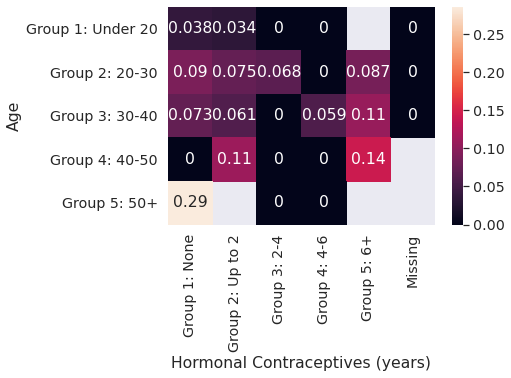

In [ ]:
# Check relationship between Hormonal Contraceptives (years) and biopsy results.

# Show average years by biopsy results.
hc = df_imputed['Hormonal Contraceptives (years)']
print('Median Hormonal Contraceptives (Years) by Biopsy Group:')
print(pd.DataFrame({'Biopsy': df_imputed['Biopsy'], 'Hormonal Contraceptives (years)': hc}).groupby('Biopsy').median())

print('\nMean Hormonal Contraceptives (Years) by Biopsy Group:')
print(pd.DataFrame({'Biopsy': df_imputed['Biopsy'], 'Hormonal Contraceptives (years)': hc}).groupby('Biopsy').mean())

# Create a pivot table and plot a heatmap with Hormonal Contraceptive and Age groupings.
pvcontr = df_piv.pivot_table(values='Biopsy',index='Age',columns='Hormonal Contraceptives (years)')
print('\n\nHeatmap Showing Percent with Positive Biopsy Results by Age & Hormonal Contraceptive Grouping')
sns.set(font_scale=1.3)
sns.heatmap(pvcontr, annot=True)


The matrix plot shows that individuals who took hormonal contraceptives for 6 or more years and who were in the 30 to 50 age groups had some of the highest percentages of positive biopsy results. Although the percentage of people with positive biopsy results in the 50+ age group who did not take hormonal contraceptives was high, note that there were only 7 individuals in this grouping (see counts below).
The median years that an individual took hormonal contraceptives did not differ based on biopsy results; however, the average number of years was slightly higher for those in the positive biopsy group, suggesting that hormonal contraceptives have a highly right-skewed distribution.

In [ ]:
# Get counts within each grouping for age and hormonal contraceptives.
df_cnts = df_piv.groupby(['Age','Hormonal Contraceptives (years)']).count()
df_cnts.columns = ['Count']
df_cnts

Count
Age               Hormonal Contraceptives (years)       
Group 1: Under 20 Group 1: None                       78
                  Group 2: Up to 2                    87
                  Group 3: 2-4                         9
                  Group 4: 4-6                         3
                  Missing                              2
Group 2: 20-30    Group 1: None                      111
                  Group 2: Up to 2                   134
                  Group 3: 2-4                        59
                  Group 4: 4-6                        40
                  Group 5: 6+                         46
                  Missing                              4
Group 3: 30-40    Group 1: None                       55
                  Group 2: Up to 2                    66
                  Group 3: 2-4                        25
                  Group 4: 4-6                        17
                  Group 5: 6+                         56
                  Missing                              1
Group 4: 40-50    Group 1: None                       18
                  Group 2: Up to 2                     9
                  Group 3: 2-4                         4
                  Group 4: 4-6                         4
                  Group 5: 6+                         21
Group 5: 50+      Group 1: None                        7
                  Group 3: 2-4                         1
                  Group 4: 4-6                         1

### Age & Biopsy Test Results


Average Age by Biopsy Group:
              Age
Biopsy           
0       26.696139
1       28.636364


Text(0, 0.5, 'Age')

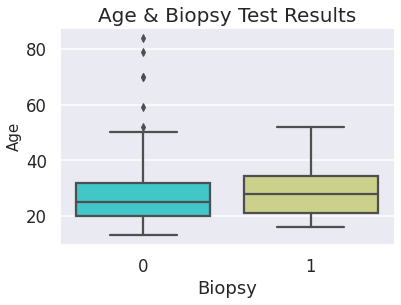

In [ ]:
# Plot age & Biopsy test results. 
print('\nAverage Age by Biopsy Group:')
print(pd.DataFrame({'Biopsy': df_imputed['Biopsy'], 'Age': df_imputed['Age']}).groupby('Biopsy').mean())

sns.set_context('talk',font_scale=1)
b = sns.boxplot(x="Biopsy", y="Age", data=df_imputed,palette='rainbow')
b.axes.set_title("Age & Biopsy Test Results",fontsize=20)
b.set_ylabel("Age",fontsize=15)

Median age was slightly higher for those with positive test results. 

### Binary Features

The following table shows:

- % individuals with feature and cancer divided by the total number of individuals with cancer

- % individuals with feature divided by the total number of individuals

In [ ]:
# Show a sorted list of the following for each binary feature:
# % individuals with feature & cancer divided by the total number of individuals with cancer

# Get binary columns and create a list of binary columns (excluding the target variable).
df_bin = df_imputed.drop(int_cols,axis=1)
cols = df_bin.drop(['Biopsy'],axis=1).columns

# Create empty lists.
c_and_col = []
w_feat = []
cnt = []

# Compute the number of individuals who have both cancer and the given feature as a 
# percent out of the total number of inidividuals with cancer.
for col in cols:
    df_col = df_bin[col]
    df_col = pd.concat([df_col,df_bin['Biopsy']],axis=1)
    yy = df_col[(df_col[col]==1) & (df_col['Biopsy']==1)]['Biopsy'].count()
    ny = df_col[(df_col[col]==0) & (df_col['Biopsy']==1)]['Biopsy'].count()
    yn = df_col[(df_col[col]==1) & (df_col['Biopsy']==0)]['Biopsy'].count()
    nn = df_col[(df_col[col]==0) & (df_col['Biopsy']==0)]['Biopsy'].count()
    c_and_col.append((100*(yy/(yy+ny))).round(2))
    w_feat.append((100*((yy+yn)/(yy+ny+nn+yn))).round(2))
    cnt.append(yy+yn)

# Concatenate dataframes.
bin_perc = pd.concat([pd.DataFrame(cols),pd.DataFrame(c_and_col),pd.DataFrame(w_feat),
                      pd.DataFrame(cnt)],axis=1)
bin_perc.columns = ['Feature','% w/ Cancer who have Feature','% of All Indiv. w/ Feature','Number with Feature']
bin_perc = bin_perc.sort_values(by=['% w/ Cancer who have Feature'], ascending=False)
bin_perc.reset_index(drop=True)

,Feature,% w/ Cancer who have Feature,% of All Indiv. w/ Feature,Number with Feature
0,Schiller,87.27,8.62,74
1,Hormonal Contraceptives,65.45,62.82,539
2,Hinselmann,45.45,4.08,35
3,Citology,32.73,5.13,44
4,STDs,21.82,9.32,80
5,Smokes,18.18,14.45,124
6,IUD,16.36,10.02,86
7,STDs:condylomatosis,12.73,5.13,44
8,STDs:vulvo-perineal condylomatosis,12.73,5.01,43
9,Dx,12.73,2.80,24


- In the list above, large gaps between the two percentages shown may suggest that a given feature is related to the outcome of the biopsy test results. 
- The Schiller test showed the strongest relationship with biopsy results; 87% of the individuals with positive biopsy results also had positive results on the Schiller test. The Hinselmann test and cytology showed a weaker relationship with biopsy results; 45% of those who had positive biopsy results also had positive Hinselmann results, and only 33% of those with positive biopsy results also had positive cytology results. 
- The list above also suggests that STDs may be related to biopsy results. Approximately 22% of individuals with positive biopsy results also had an STD in the past, whereas only 9% of the total people surveyed had an STD in the past.

# Feature Engineering

## Outlier Treatment

### Box Plot
We also visualize all the features with box plots. A box plot is a graphical representation to visualize quantiles and outliers of a data distrbution. Outliers are depicted as single points.

In [ ]:
num_cols = ['Age', 
            'Number of sexual partners', 
            'First sexual intercourse', 
            'Num of pregnancies',
            'Hormonal Contraceptives (years)', 
            'IUD (years)',
            'STDs (number)',
            'STDs: Number of diagnosis',
            'Smokes (years)',
            'Smokes (packs/year)'
           ]

In [ ]:
num_cols

['Age',
 'Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Hormonal Contraceptives (years)',
 'IUD (years)',
 'STDs (number)',
 'STDs: Number of diagnosis',
 'Smokes (years)',
 'Smokes (packs/year)']

In [ ]:
df_copy = df.copy()
df_copy[num_cols]=df_copy[num_cols].astype('float64')

Age                                    AxesSubplot(0.125,0.71587;0.168478x0.16413)
Number of sexual partners           AxesSubplot(0.327174,0.71587;0.168478x0.16413)
First sexual intercourse            AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Num of pregnancies                  AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Hormonal Contraceptives (years)       AxesSubplot(0.125,0.518913;0.168478x0.16413)
IUD (years)                        AxesSubplot(0.327174,0.518913;0.168478x0.16413)
STDs (number)                      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
STDs: Number of diagnosis          AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Smokes (years)                        AxesSubplot(0.125,0.321957;0.168478x0.16413)
Smokes (packs/year)                AxesSubplot(0.327174,0.321957;0.168478x0.16413)
dtype: object

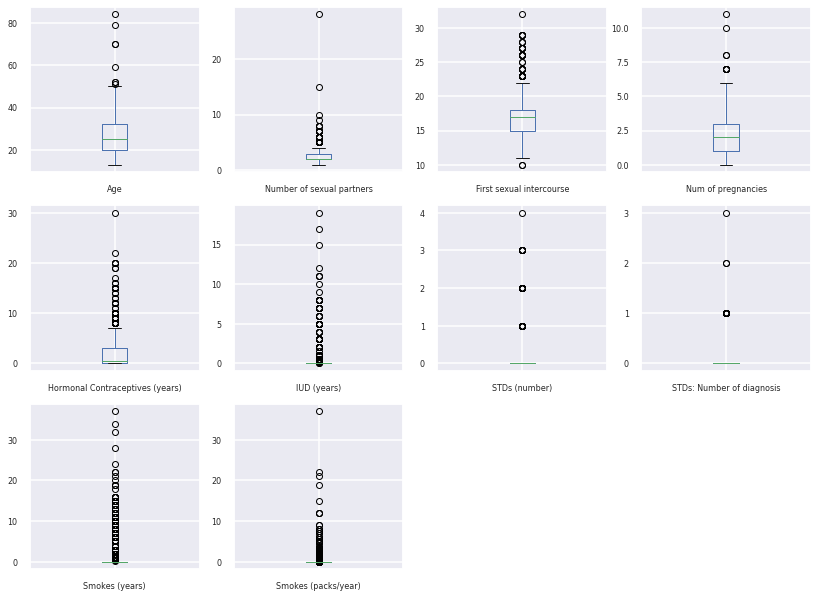

In [ ]:
df_copy[num_cols].plot(kind='box',subplots=True, layout=(4,4), fontsize=8, figsize=(14,14))

The above graph implies that the data contains outliers.

In [ ]:
IQR=df_copy[num_cols].describe().T['75%']-df_copy[num_cols].describe().T['25%']

min,max=[df_copy[num_cols].describe().T['25%']-(IQR*1.5),df_copy[num_cols].describe().T['75%']+(IQR*1.5)]

for i in num_cols:
    print('range of',i,'b/w',min[i],'and',max[i])

for i in num_cols:
    df_copy[i][df_copy[i]>max[i]]=max[i]
    df_copy[i][df_copy[i]<min[i]]=min[i]

range of Age b/w 2.0 and 50.0
range of Number of sexual partners b/w 0.5 and 4.5
range of First sexual intercourse b/w 10.5 and 22.5
range of Num of pregnancies b/w -2.0 and 6.0
range of Hormonal Contraceptives (years) b/w -4.5 and 7.5
range of IUD (years) b/w 0.0 and 0.0
range of STDs (number) b/w 0.0 and 0.0
range of STDs: Number of diagnosis b/w 0.0 and 0.0
range of Smokes (years) b/w 0.0 and 0.0
range of Smokes (packs/year) b/w 0.0 and 0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/u

Here using IQR technique, we have capped the extreme values above the upper whiscur value to the value of upper whiscur and similarly capped the extreme lower values to the value of lower whiscur value.

Age                                    AxesSubplot(0.125,0.71587;0.168478x0.16413)
Number of sexual partners           AxesSubplot(0.327174,0.71587;0.168478x0.16413)
First sexual intercourse            AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Num of pregnancies                  AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Hormonal Contraceptives (years)       AxesSubplot(0.125,0.518913;0.168478x0.16413)
IUD (years)                        AxesSubplot(0.327174,0.518913;0.168478x0.16413)
STDs (number)                      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
STDs: Number of diagnosis          AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Smokes (years)                        AxesSubplot(0.125,0.321957;0.168478x0.16413)
Smokes (packs/year)                AxesSubplot(0.327174,0.321957;0.168478x0.16413)
dtype: object

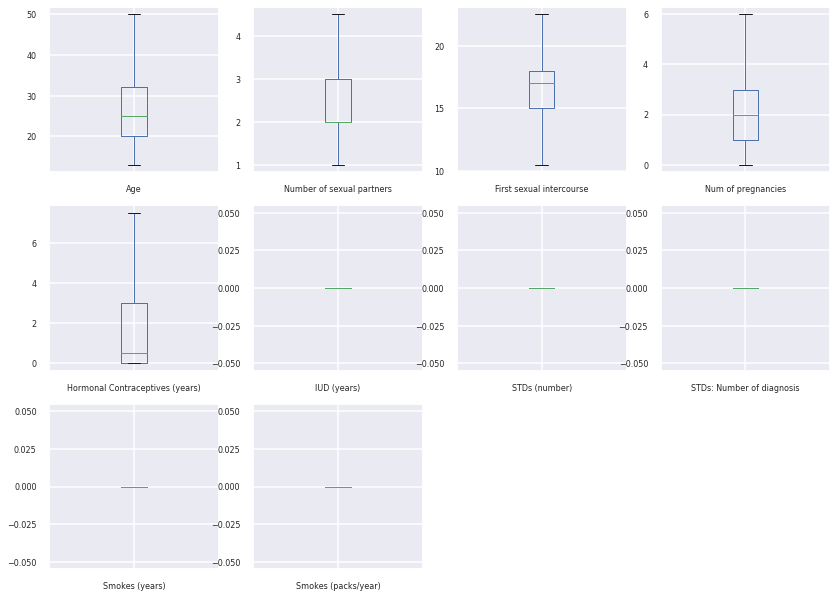

In [ ]:
df_copy[num_cols].plot(kind='box',subplots=True, layout=(4,4), fontsize=8, figsize=(14,14))

Now the outliers has been removed/capped

# Feature selection

Feature selection is the process of reducing the number of input variables when developing a predictive model. 
It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.
Feature selection is a technique where we choose those features in our data that contribute most to the target variable. In other words we choose the best predictors for the target variable.
The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.




**Benefits of performing feature selection before modeling:**
* Reduces Overfitting: Less redundant data means less possibility of making decisions based on redundant data/noise.
* Improves Accuracy: Less misleading data means modeling accuracy improves.

* Reduces Training Time: Less data means that algorithms train faster.

## Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.
The scikit-learn library provides the **SelectKBest** class that can be used with a suite of different statistical tests to select a specific number of features.
We used the **chi-squared (chi²) statistical test** for non-negative features to select 4 of the best features from our dataset.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df_imputed.iloc[:,0:4]  #independent columns
y = df_imputed.iloc[:,26]    #target column 
#apply SelectKBest class to extract top 4 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(4,'Score'))  #print 4 best features

                     Feature     Score
0                        Age  7.224831
3         Num of pregnancies  1.073242
1  Number of sexual partners  0.121824
2   First sexual intercourse  0.013165


## Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model. **Feature importance** gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable. Feature importance is an inbuilt class that comes with **Tree Based Classifiers**, we will be using **Extra Tree Classifier** for extracting the top 10 features for the dataset.

[0.1981365  0.11561831 0.1626052  0.1314934  0.19809833 0.06421324
 0.02829086 0.01637208 0.04672608 0.03844601]


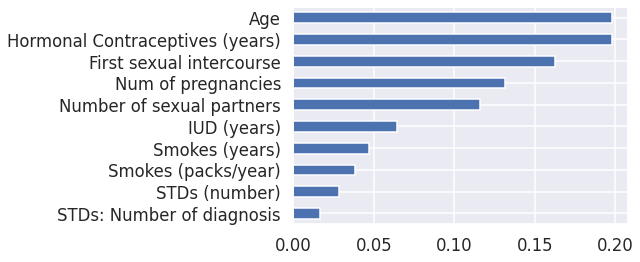

In [ ]:
# Top 10 Important features 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
X = df_imputed.iloc[:,0:10]  #independent columns
y = df_imputed.iloc[:,26]    #target column 
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.show()

# Overwiew on Machine Learning Algorithms

Machine learning algorithms can be divided in four categories: supervised learning, unsupervised learning, semi supervised learning and Reinforcement learning.

 In this project I will focus on supervised learning. In supervised learning, we are feeding the algorithm with the training set and their relative labels. The supervised learning algorithms we will analyze are:

* Logistic Regression
* Decision Trees
* Random Forests
* Naive Bayes

Once we define our model, we have to train the model on the training set, validate it on the validation set and then test it on the test set. To evaluate our models we introduce some metrics and some definitions.
At the end of our training and validation phase, we will have a vector of predicted labels 
ypred  to compare to the true labels ytrue.
Doing such comparisons we can come across four different scenarios:

* TP: correct predictions of positive class
* TN: correct predictions of negative class
* FP: wrong predictions of positive class
* FN: wrong predictions of negative class


The metrics we will refer to are the following:
* precision: the accuracy of the positive predictions
\begin{align}
precision = \frac{TP}{TP + FP}
\end{align}
* recall: also called sensitivity or true positive rate, it is the ratio of positive instances that are correctly detected by the classifier
\begin{align}
recall = \frac{TP}{TP + FN}
\end{align}
* accuracy: it is the measure of all the correctly identified samples, mostly used where classes are balanced
\begin{align}
accuracy = \frac{TP + TN}{TP + FP + TN + FN}
\end{align}
* f1 score: which combines precision and recall
\begin{align}
F_1 = 2 \text{ x } \frac{precision \text{ x } recall}{precision + recall}
\end{align}

Now we can split the dataset in train, validation and test sets. We will use k-fold cross-validation to validate our models. In cross-validation we first divide the dataset in training set and test set and then the training data in divided in k fold, one of them will our validation set. This split is repeated k times. A graphical representation of such splits is reported below. \

When the model requires hyper-parameters search we will use GridSearchCV, which finds the best configuration applying a cross-validation with k=10. 

![alt text](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

## 1. Logistic Regression

Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class. If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it
belongs to the negative class, labeled “0”). This makes it a binary classifier.
Like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the
logistic of this result 
\begin{align}
\hat{p} =\sigma(x^Tw)
\end{align}
where $\sigma$ is the sigmoid function that outputs a number between 0 and 1, x are our training data and w the parameter of the model we want to find. 
\begin{align}
\sigma(x) = \frac{1}{1+ e^{-x}}
\end{align}

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/480px-Logistic-curve.svg.png)

Once the model has estimated the probabily, the prediction is made in the following way:
* if $\hat{p} < $ 0.5, the predicted class is equal to 0;
* if $\hat{p} \ge$ 0.5,  the predicted class is equal to 1.

The way the model is trained can be derived by the cost function. The objective of training is to set the parameter vector $w$ so that the model estimates high probabilities for positive instances (y = 1) and low probabilities for negative instances (y = 0).
\begin{align}
c(w) = 
\begin{cases}
-log(\hat{p}) & \text{if y = 1 }\\
-log(1 - \hat{p})  & \text{if y = 0}
\end{cases}
\end{align}


**PROS:**
* Feature scaling not needed;
* Hyper-parameters tuning not needed.


**CONS:**
* Poor performance on non-linear data (image data);
* Poor performance with irrelevant and highly correlated features;
* Not very powerful algorithm in respect to others.


## 2. Decision Trees

Decision Trees can perform both classification and regression tasks, in this project we only consider the classification case. They are also fundamental components of Random Forests, presented in the next chapter. \
A decision tree consists of split nodes and leaf nodes. Each split node  performs a split decision and routes a data sample x to the left child node or to the right child node. Starting at the root node, the training data is recursively split into subsets. In each step the best split is determined based on a criterion. Commonly used criteria are Gini index and Entropy: 
\begin{align}
G_i = 1 - \sum_{k=1}^{n} p_{i,k}^2 \\
H_i = - \sum_{k=1}^{n} p_{i,k}logp_{i,k}
\end{align}
where $ p_{i,k}$ is the ratio of class k instances among the training instances in the $i^{th}$ node. \
Another common hyperparameter the user can set in the model is the max depth of the tree. \
**PROS:**
* Normalization or scaling of data not needed;
*  No considerable impact of missing values;
* Easy visualization;
* Automatic Feature selection.

**CONS:**
* Prone to overfitting when using too much layers;
* Sensitive to data. If data changes slightly, the outcomes can change to a very large extent;
* Higher time required for training.

![alt text](https://www.researchgate.net/profile/Mei-Hung_Chiu/publication/295860754/figure/fig3/AS:333010919542789@1456407398669/Basic-structure-of-a-decision-tree-All-decision-trees-are-built-through-recursion.png)



## 3. Random Forests

A Random Forest in an ensemble of Decision Trees, trained via the bagging method. Ensemble combines multiple algorithms (in our case decision trees) in order to improve accuracy and stability and also to avoid overfitting. \
Starting from the original dataset D, B random sample are taken with replacement, note that the size of the samples is equals to the size training data. Then one decision tree is trained for each sample B, this sampling technique is called bootstrap. Once the training phase is done, for each candidate split, a random subset of features $\sqrt(n)$ is selected: Dping so trees are decorellated, this process is called feature bagging. At the end the class is assigned with majority vote coming from all the decision trees. All this process can be observe in the figure below. \

**PROS:**
* Good Performance on imbalanced datasets;
* Handling of huge amount of data;
* Good handling of missing data like decision trees;
* Little impact of outliers;
* Prevents overfitting;
* Useful to extract feature importance:

**CONS:**
* Predictions of the trees need to be uncorrelated.
* Black Box.

![alt text](https://miro.medium.com/max/875/1*58f1CZ8M4il0OZYg2oRN4w.png)

## 4. Naive Bayes

The Naive Bayes algorithm is a supervied machine learning algorithm used for classification derived from the Bayes theorem. Given two events A and B, the bayes theorem can be written as:
\begin{align}
P(A|B) = \frac{P(B|A)P(A)}{P(B)}
\end{align}
This rule can be reformulated as it follows: 
\begin{align}
P(\text{hypothesis }|\text{ evidence}) = \frac{P(\text{evidence }|\text{ hypothesis}) P(\text{hypothesis})}{P(\text{evidence})}
\end{align}
\
One assumption for applying the Naive Bayes classifier is that all samples have to i.i.d (independent identically distributed)

**PROS:**
* Real time predictions;
* Scalable with Large datasets;
* Multi class prediction is effectively done;
* Good performance with high dimensional data.

**CONS:**
* Independence of features does not hold: the fundamental Naive Bayes assumption is that each feature makes an independent and equal contribution to the outcome. However this condition is not met most of the times;
* Bad estimator: Probability outputs from predict_proba are not to be taken too seriously;
* Training data should represent population well: If you have no occurrences of a class label and a certain attribute value together (e.g. class=”No”, shape=”Overcast “) then the posterior probability will be zero. So if the training data is not representative of the population, Naive bayes does not work well.


# Initial Models

A model will be build to predict biopsy results using cytology results and other potential risk factors. Cytology results will be include in the predictive models due to the fairly routine nature of this test. 

The exploratory analysis shows that if we had a model that predicted biopsy results based only on cytology results, we would have predicted approximately 33% of the positive biopsy results correctly. The goal with the predictive model is to improve our chances of accurately predicting biopsy results and to understand which risk factors have the biggest impact within the model.

### Train Test Split

In [ ]:
df_imputed = df_imputed.astype('float64')

# Train test split, setting aside 30% of the data for testing the model.
x = df_imputed.drop('Biopsy',axis=1)
y = df_imputed['Biopsy']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

l= []  #List to store the various model metrics 


In [ ]:
def plot_accuracy(y_test, y_pred):
  plt.figure(figsize=(5,5))
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, annot_kws={"fontsize":18}, linewidths=.5, square = True, cmap = "YlGnBu",fmt='.2f');
  plt.ylabel('Actual label');
  plt.xlabel('Predicted label');
  all_sample_title = 'F1 Score: {0}'.format(f1_score(y_test, y_pred))
  plt.title(all_sample_title, size = 15)


In [ ]:
def models_lr(x,y):
    mod = {}
    model = LogisticRegression().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'LogisticRegression'
    mod['Train_Score'] = model.score(x_train,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l.append(models_lr(x_train,y_train))

def models_dt(x,y):
    mod = {}
    model = DecisionTreeClassifier().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'Decision Tree'
    mod['Train_Score'] = model.score(x_train,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l.append(models_dt(x_train,y_train))

def models_rf(x,y):
    mod = {}
    model = RandomForestClassifier().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'Random Forest'
    mod['Train_Score'] = model.score(x_train,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l.append(models_rf(x_train,y_train))

def models_nb(x,y):
    mod = {}
    model = GaussianNB().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'GaussianNB'
    mod['Train_Score'] = model.score(x_train,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l.append(models_nb(x_train,y_train))


In [ ]:
base_df = pd.DataFrame(l)
base_df

,Model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
0,LogisticRegression,0.966667,0.957364,0.702703,0.684211,0.722222,0.831645
1,Decision Tree,1.000000,0.926357,0.558140,0.631579,0.500000,0.790685
2,Random Forest,1.000000,0.937984,0.555556,0.526316,0.588235,0.748514
3,GaussianNB,0.818333,0.844961,0.487179,1.000000,0.322034,0.916318


# Final Model and Optimization

### Sampling

Using Sampling Strategies

Another way to approach the problem of imbalance is to use some form of sampling, in order to balance the classes before giving them to the model. This allows for greater control of the data and domain appropriate strategy selection. We will explore some of the possible options in the following sections.

Oversampling

In oversampling we create additional data for the minority class either by making duplicates from the minority class or by some method to make additional synthetic data that is representative of the minority class.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


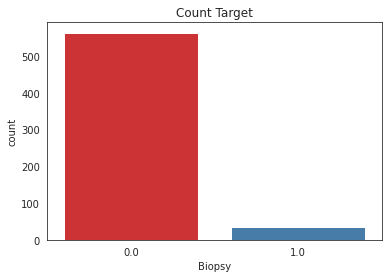

In [ ]:
sns.countplot(y_train,palette="Set1")
plt.title("Count Target")
plt.show()

SMOTE

The Synthetic Minority Over-sampling TEchnique (SMOTE) generates new points for the minority class by fully connecting all points in the minority class with straight lines. Then for each existing data point SMOTE then determines a point on these interconnections to make a new point based on how many of the closest neighbours are considered for synthesis (k_neighbors).

NOTE: By default k_neighbors=5. Here minority class only has 5 members in total. 

In [ ]:
x_train_s, y_train_s = SMOTE(random_state=33).fit_resample(x_train, y_train.ravel())
print(sorted(Counter(y_train_s).items()))

[(0.0, 564), (1.0, 564)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


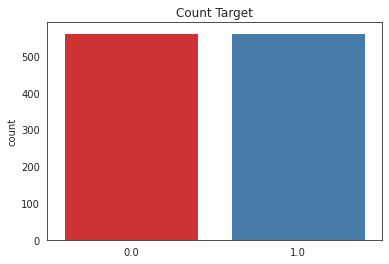

In [ ]:
sns.countplot(y_train_s,palette="Set1")
plt.title("Count Target")
plt.show()

* Now 0 and 1 classes have same proportions

In [ ]:
l_final = [] #--> New list for storing metrics of base models

def models_dt(x,y):
    mod = {}
    model = DecisionTreeClassifier().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'Decision Tree After Sampling'
    mod['Train_Score'] = model.score(x_train_s,y_train_s)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l_final.append(models_dt(x_train_s,y_train_s))

def models_rf(x,y):
    mod = {}
    model = RandomForestClassifier().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'Random Forest After Sampling'
    mod['Train_Score'] = model.score(x_train_s,y_train_s)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l_final.append(models_rf(x_train_s,y_train_s))

In [ ]:
final_model = pd.DataFrame(l_final)
final_model

,Model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
0,Decision Tree After Sampling,1.0,0.953488,0.739130,0.894737,0.629630,0.926448
1,Random Forest After Sampling,1.0,0.957364,0.744186,0.842105,0.666667,0.904316


### Hyper Parameter Tuning

In [ ]:
tree = DecisionTreeClassifier()
tree_param = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],  
    'max_depth':[3,4,5,6],
    'max_features':['auto','log2'],
    'random_state':[123]
}

grid = GridSearchCV(tree, tree_param, cv=10)
best_parameter_search = grid.fit(x_train_s,y_train_s.ravel())
DTC_best = best_parameter_search.best_params_
DTC_best

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'random_state': 123,
 'splitter': 'best'}

In [ ]:
rf = RandomForestClassifier()
rf_params = {
    'n_estimators' : range(10,100,10),
    'max_depth' : range(2,10,1),
    'criterion' : ['gini','entropy'],
    'max_leaf_nodes' : range(2,10,1),
    'max_features' : ['auto','log2']
}

grid = RandomizedSearchCV(rf, rf_params, cv=10)
best_parameter_search = grid.fit(x_train_s,y_train_s.ravel())
RFC_best = best_parameter_search.best_params_
RFC_best

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': 9,
 'n_estimators': 70}

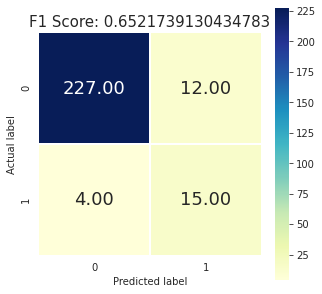

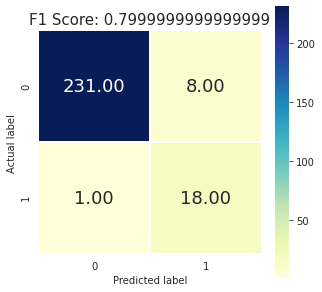

In [ ]:
l_hyper = []

def models_dt(x,y):
    mod = {}
    model = DecisionTreeClassifier(criterion= 'gini', max_depth = 4, max_features = 'auto', random_state = 123, splitter = 'best').fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'Decision Tree after Hyperparameter Tuning'
    mod['Train_Score'] = model.score(x_train_s,y_train_s.ravel())
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    plot_accuracy(y_test, ypred)
    return mod
l_hyper.append(models_dt(x_train_s,y_train_s.ravel()))

def models_rf(x,y):
    mod = {}
    model = RandomForestClassifier(criterion= 'gini', max_depth = 9, max_features = 'log2', max_leaf_nodes=9, n_estimators=50).fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'Random Forest After Hyperparameter Tuning'
    mod['Train_Score'] = model.score(x_train_s,y_train_s.ravel())
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    plot_accuracy(y_test, ypred)
    return mod
l_hyper.append(models_rf(x_train_s,y_train_s.ravel()))

In [ ]:
final_model = final_model.append(l_hyper)
final_model

,Model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
0,Decision Tree After Sampling,1.000000,0.953488,0.739130,0.894737,0.629630,0.926448
1,Random Forest After Sampling,1.000000,0.957364,0.744186,0.842105,0.666667,0.904316
0,Decision Tree after Hyperparameter Tuning,0.964539,0.937984,0.652174,0.789474,0.555556,0.869632
1,Random Forest After Hyperparameter Tuning,0.978723,0.965116,0.800000,0.947368,0.692308,0.956948


# Conclusions

* Exploratory data analysis suggests that having positive cytology results, Number of Pregnancies, age, and hormonal contraceptives (years) may increase someone's likelihood to have positive biopsy results.

* This report presents the comparison between different machine learning classifiers for Cervical Cancer dataset. Since the dataset was imbalanced we used oversampling (SMOTE) to balance the dataset. After that, we applied feature selection and finally hyperparameter tuning to improve the performance of the model.


# References

* UCI's Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29<br>
* Cancer.gov Website: https://www.cancer.gov/types/cervical/pap-hpv-testing-fact-sheet#q3<br>
* Kaggle: https://www.kaggle.com/<br>
towardsdatascience: Practical tips for class imbalance in binary classification: https://towardsdatascience.com/practical-tips-for-class-imbalance-in-binary-classification-6ee29bcdb8a7 <br>
* Medium: Fundamental Techniques Of Feature
Engineering For Machine Learning: https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114 <br>
* Missing data imputation with fancyimpute: https://www.geeksforgeeks.org/missing-data-imputation-with-fancyimpute/
<br>
* Medium: How to handle missing values? : https://medium.com/analytics-vidhya/how-to-handle-missing-values-byaryan-cb76b9dbaae2
<br>
* Medium: Dealing with Imbalanced Data: 
https://medium.com/digital-catapult/dealing-with-imbalanced-data-8b21e6deb6cd
